In [3]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
TRAIN_PATH = 'data/train.csv'
TEST_PATH = 'data/test.csv'
SAMPLE_SUBMISSION = 'data/sample_submission.csv'
RANDOM_STATE = 25
COLORS = plt.cm.cool_r(np.linspace(0, 1, 10))

! Multioutput regression

In [14]:
train = pd.read_csv(TRAIN_PATH)
test = pd.read_csv(TEST_PATH)

In [15]:
train.head(5)

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [17]:
FEATURE_COLUMNS = ['full_text']
TARGET_COLUMNS = ['cohesion', 'syntax','vocabulary', 'phraseology', 'grammar','conventions']

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


#### Target distributions 

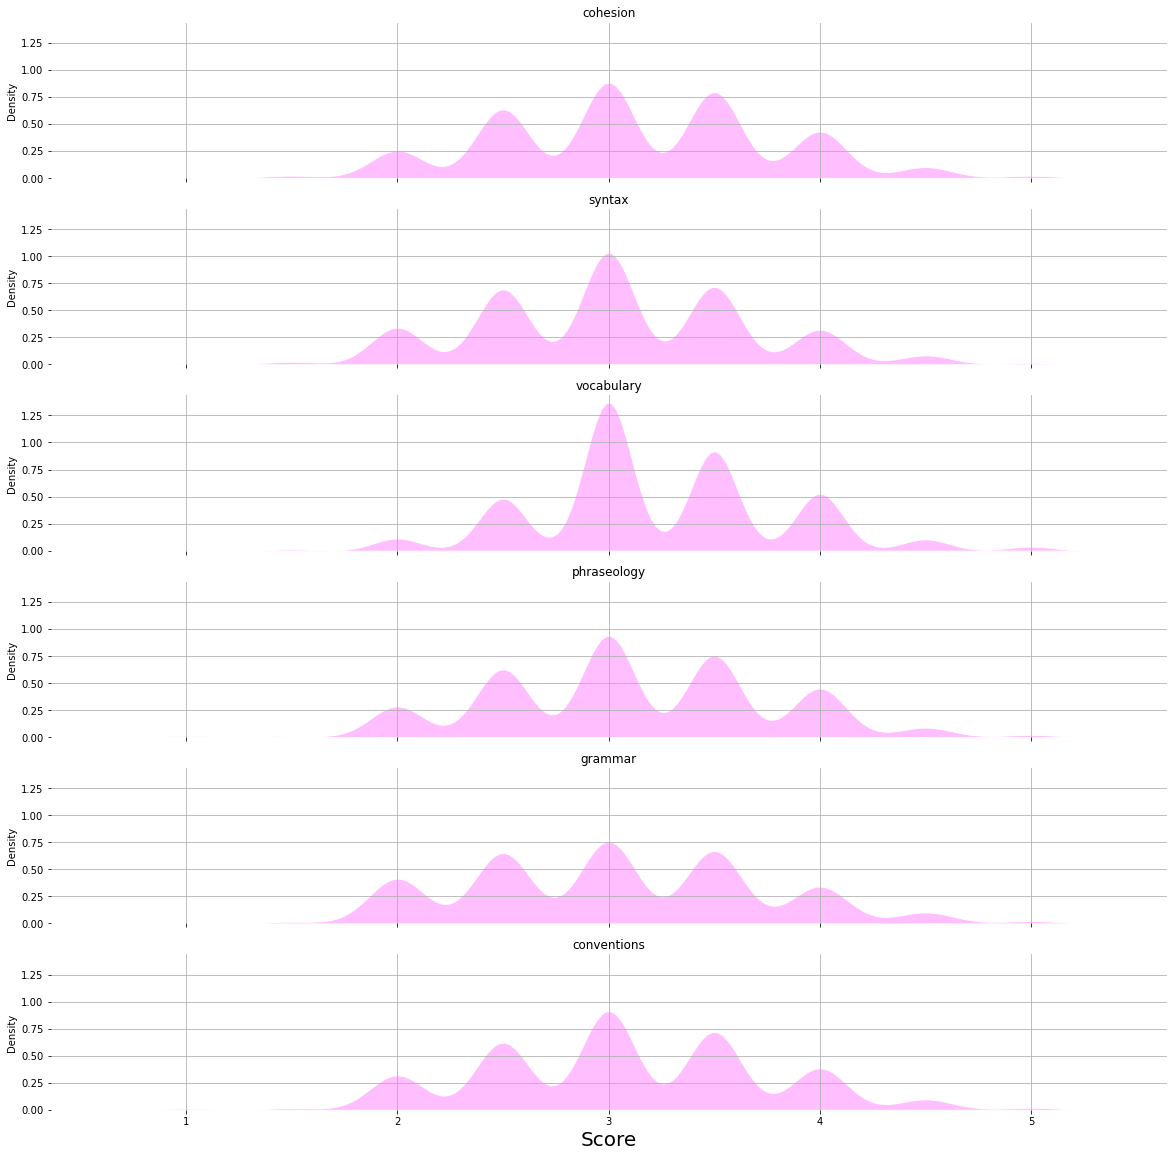

In [47]:
fig, axs = plt.subplots(nrows=len(TARGET_COLUMNS), ncols = 1, figsize = (20, 20), sharex = True, sharey = True)

for idx, target_col in enumerate(TARGET_COLUMNS):
    axs[idx].set_title(target_col)
    sns.kdeplot(train[target_col], color = COLORS[0], ax = axs[idx], fill = True, edgecolor = 'white', label = target_col)
    axs[idx].set_frame_on(False)
    axs[idx].grid(True)

plt.xlabel('Score', fontsize = 20)
plt.show()

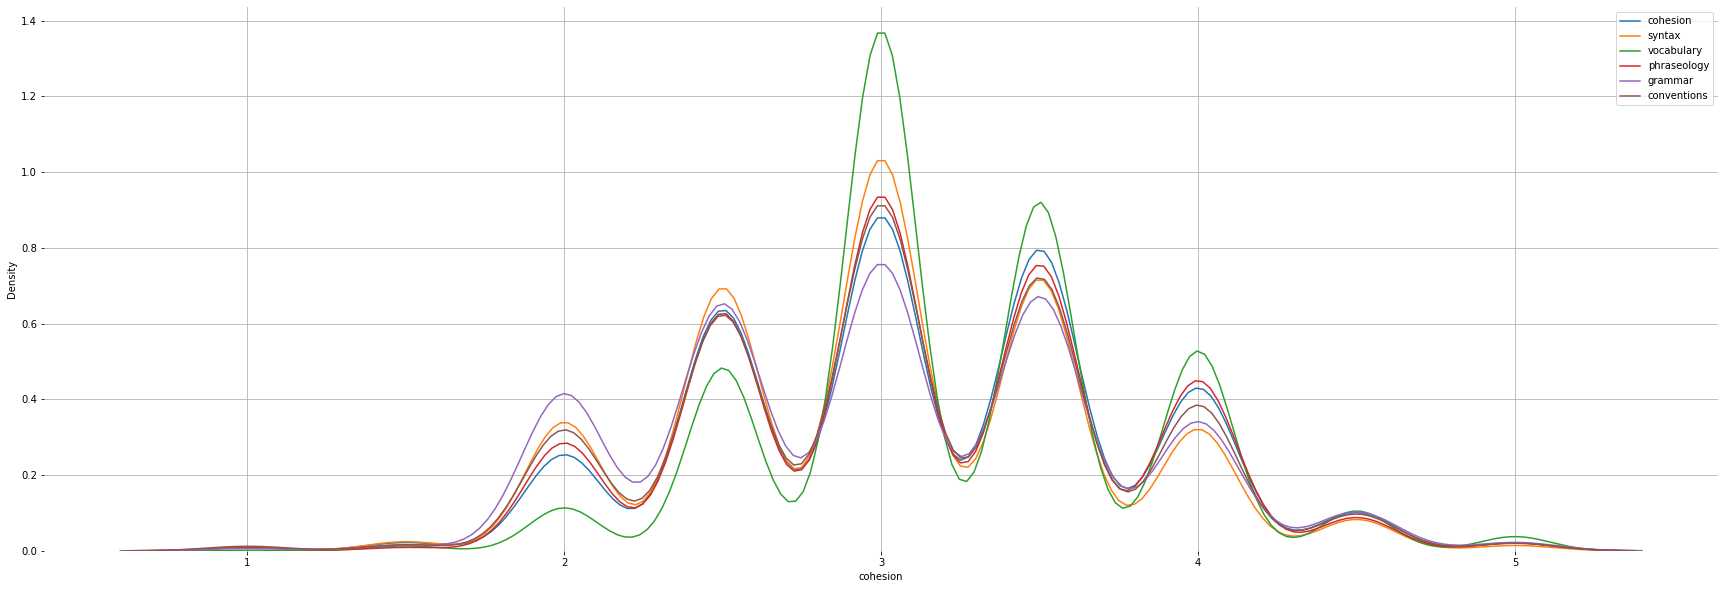

In [60]:
fig = plt.figure(figsize = (30, 10))

for idx, target_col in enumerate(TARGET_COLUMNS):
    sns.kdeplot(train[target_col], palette='cool_r', fill = False, label = target_col)

plt.box(False)
plt.grid(True)
plt.legend()
plt.show()

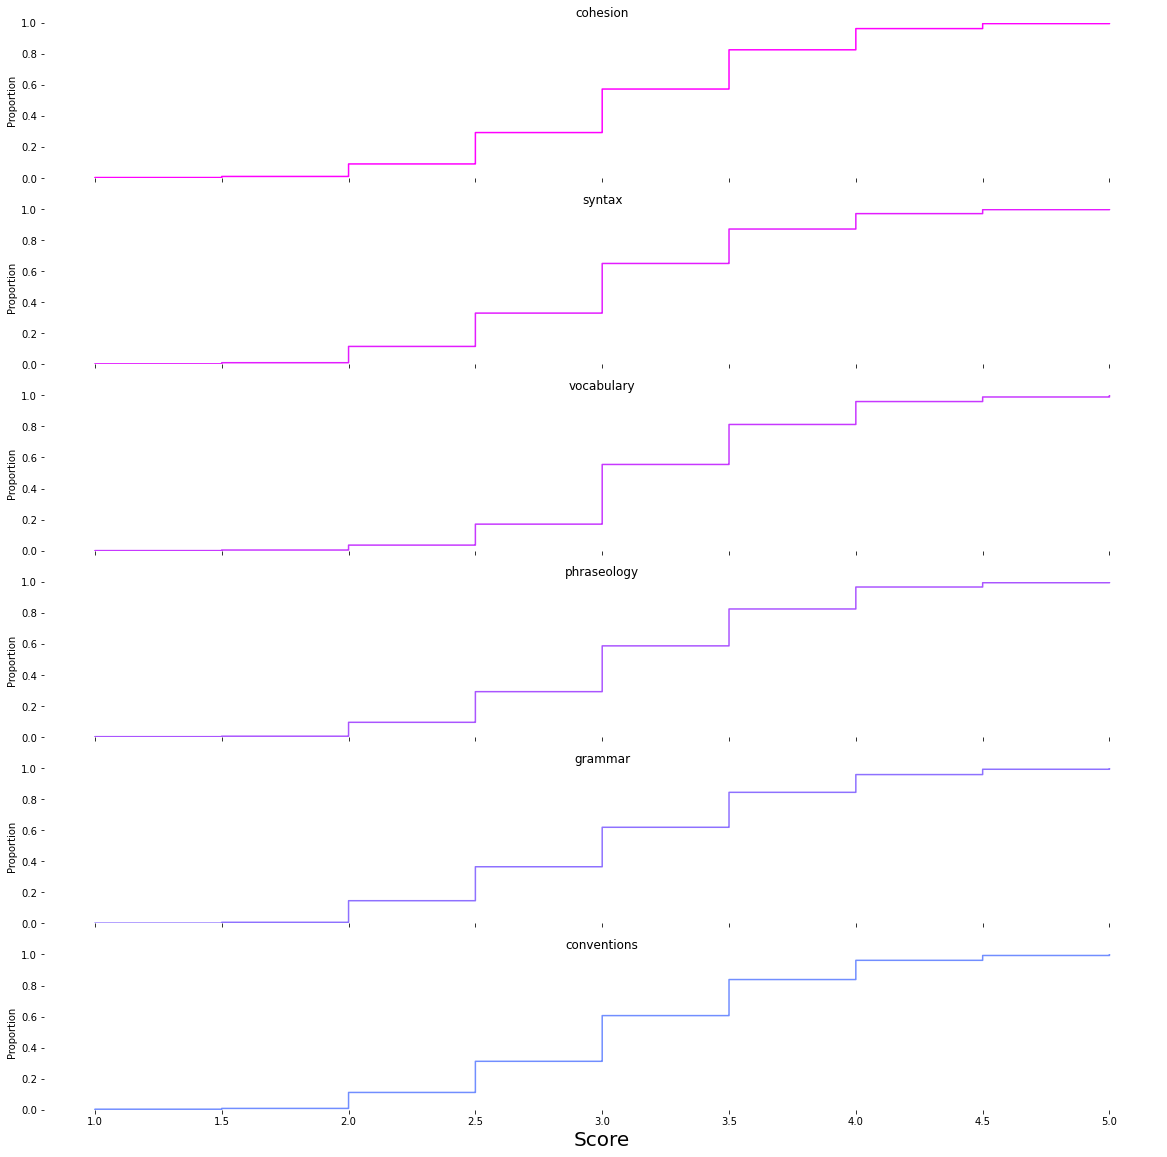

In [102]:
fig, axs = plt.subplots(nrows=len(TARGET_COLUMNS), ncols = 1, figsize = (20, 20), sharex = True, sharey = True)

for idx, target_col in enumerate(TARGET_COLUMNS):
    axs[idx].set_title(target_col)
    sns.ecdfplot(train[target_col], color = COLORS[idx], ax = axs[idx], label = target_col)
    axs[idx].set_frame_on(False)
    axs[idx].grid(False)

plt.xlabel('Score', fontsize = 20)
plt.show()

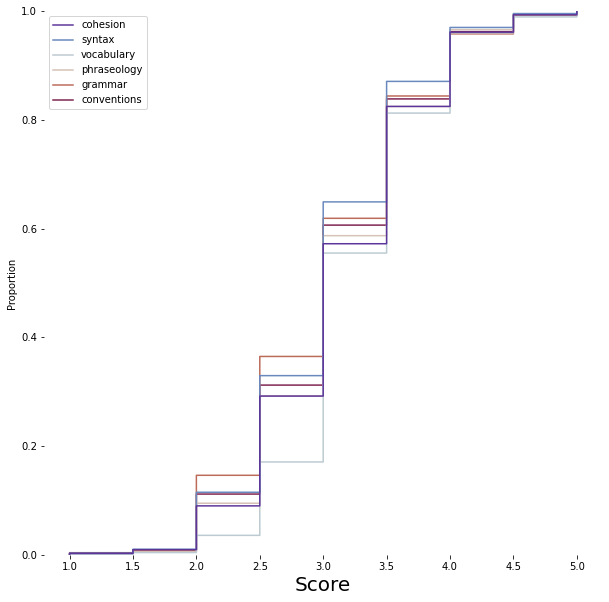

In [120]:
fig, axs = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
sns.ecdfplot(train[TARGET_COLUMNS], palette='twilight_shifted', ax = axs)

plt.xlabel('Score', fontsize = 20)
plt.box(False)
plt.show()